In [129]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [130]:
def distanceBetweenPoints(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [141]:
def trojkatHeron(P1, P2, P3, data, fill = 1):
    x1, y1 = P1
    x2, y2 = P2
    x3, y3 = P3
    
    ab = distanceBetweenPoints(x1, y1, x2, y2)
    bc = distanceBetweenPoints(x2, y2, x3, y3)
    ac = distanceBetweenPoints(x1, y1, x3, y3)
    pMain = (ab + bc + ac)/2
    FieldMain = math.sqrt(pMain*(pMain-ab)*(pMain-bc)*(pMain-ac))+1
    
    for i in range(min(x1, x2, x3), max(x1, x2, x3)):
        for j in range(min(y1, y2, y3), max(y1, y2, y3)):

            aq = distanceBetweenPoints(x1, y1, i, j)
            bq = distanceBetweenPoints(x2, y2, i, j)
            cq = distanceBetweenPoints(x3, y3, i, j)

            pABQ = (ab + bq + aq)/2
            pAQC = (ac + aq + cq)/2
            pQBC = (cq + bq + bc)/2
            
            FieldABQ = 0
            FieldAQC = 0
            FieldQBC = 0
            if (pABQ*(pABQ-ab)*(pABQ-bq)*(pABQ-aq) > 0 
                and pAQC*(pAQC-ac)*(pAQC-aq)*(pAQC-cq) > 0
                and pQBC*(pQBC-cq)*(pQBC-bq)*(pQBC-bc) > 0):
                FieldABQ = math.sqrt(pABQ*(pABQ-ab)*(pABQ-bq)*(pABQ-aq))
                FieldAQC = math.sqrt(pAQC*(pAQC-ac)*(pAQC-aq)*(pAQC-cq))
                FieldQBC = math.sqrt(pQBC*(pQBC-cq)*(pQBC-bq)*(pQBC-bc))

            if FieldMain > (FieldABQ + FieldAQC + FieldQBC):
                data[j, i] = 0
    
    return data
            

In [142]:
def createTriangles(*args):
    points = list(args)
    triangles = []
    for Pi in points:
        redFlag = False
        for i in triangles:
            if Pi in i:
                redFlag = True
        if (not redFlag):
            distances = []
            for Pj in points:
                if Pj != Pi:
                    d = math.sqrt( (Pi[1]-Pj[1])**2 + (Pi[0]-Pj[0])**2 )
                    distances.append((Pj, d))
            m = distances[0]
            for i in distances[1:]:
                if i[1] > m[1]:
                    m = i
            distances.remove(m)
            triangles.append([Pi] + [tpl[0] for tpl in distances])
        
    return triangles

In [157]:
def quadrilateral(m, n, P1, P2, P3, P4, fill=0):
    data = np.zeros((m, n, 3), dtype=np.uint8)
    data.fill(255)
    
    triangles = createTriangles(P1, P2, P3, P4)
    for triangle in triangles:
        P1 = triangle[0]
        P2 = triangle[1]
        P3 = triangle[2]
            
        data = trojkatHeron(P1, P2, P3, data, fill)
        
    return data

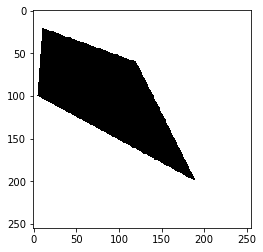

In [158]:
data = quadrilateral(255, 255, (10, 20), (5, 100), (120, 60), (190, 200))

plt.imshow(data, interpolation='none', aspect=1)
plt.show()

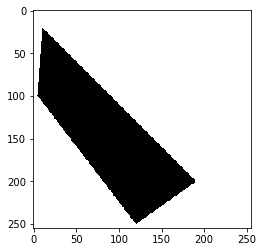

In [159]:
data = quadrilateral(255, 255, (10, 20), (5, 100), (120, 250), (190, 200))

plt.imshow(data, interpolation='none', aspect=1)
plt.show()

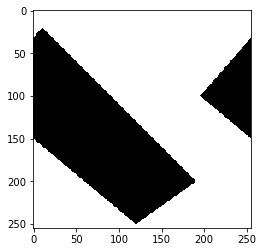

In [161]:
data = quadrilateral(255, 255, (10, 20), (-60, 100), (120, 250), (190, 200))

plt.imshow(data, interpolation='none', aspect=1)
plt.show()